<a href="https://colab.research.google.com/github/hermannvargens/doutorado/blob/main/An%C3%A1lise_de_Imagem_etanol_agua_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import cv2
import matplotlib.cm as cm

# Paleta de Cores

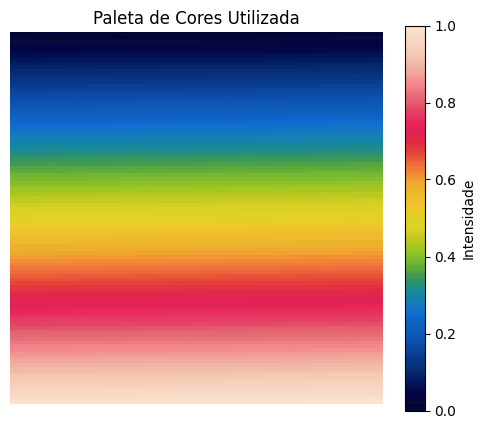

In [3]:
# Abrir a imagem e converter para RGB
imagem = Image.open("paleta.png").convert("RGB")

# Reduzir para 1 pixel de largura mantendo a altura
largura = 1
altura = imagem.height
imagem_reduzida = imagem.resize((largura, altura))

# Extrair os valores RGB invertendo a ordem (de baixo para cima)
cores_rgb = [imagem_reduzida.getpixel((0, y)) for y in reversed(range(altura))]

# Normalizar os valores RGB para o intervalo [0, 1]
cores_rgb_norm = [(r/255, g/255, b/255) for r, g, b in cores_rgb]

# Criar colormap personalizado
paleta_cores = ListedColormap(cores_rgb_norm, name="paleta_vertical")

# Exemplo de uso com uma imagem de teste
dados = np.linspace(0, 1, 10000).reshape(100, 100)

plt.figure(figsize=(6, 5))
plt.imshow(dados, cmap=paleta_cores)
plt.colorbar(label="Intensidade")
plt.title("Paleta de Cores Utilizada")
plt.axis('off')
plt.show()

# Analisar imagens

### Funções utilizadas

In [23]:
def carregar_imagem(image_path):

  image = cv2.imread(image_path)

  # Converter de BGR para RGB
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Exibir a imagem para análise
  plt.imshow(image_rgb)
  plt.axis("off")
  plt.title("Imagem Carregada")
  plt.show()

  return image

In [24]:
# Criar a função para converter RGB para temperatura
def rgb_to_temperature(rgb_color, cmap, min_temp=0, max_temp=100):
    """
    Converte uma cor RGB em um valor de temperatura com base no mapa de cores fornecido.
    """
    cmap = paleta_cores

    # Normalizar o RGB para [0, 1]
    rgb_norm = np.array(rgb_color) / 255.0

    # Criar um vetor de cores do colormap
    colormap_values = cmap(np.linspace(0, 1, 256))[:, :3]  # Remover alpha channel

    # Calcular a menor distância entre a cor e o colormap
    distances = np.linalg.norm(colormap_values - rgb_norm, axis=1)
    index = np.argmin(distances)

    # Mapear para a escala de temperatura
    temperature = min_temp + (index / (len(colormap_values) - 1)) * (max_temp - min_temp)

    return temperature

In [25]:
#Função para obter o mapa de temperaturas de acordo com cada cor
def obter_mapa_temperatura(imagem, cmap, min_temp, max_temp):
  """
  Obter o mapa de temperaturas de acordo com cada cor
  """

  # Converter de BGR para RGB
  image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

  # Obter dimensões da imagem
  h, w, _ = image_rgb.shape

  # Definir o mapa de cores
  cmap = cmap

  # Criar uma matriz para armazenar as temperaturas
  temperature_map = np.zeros((h, w))

  # Percorrer toda a imagem pixel por pixel
  for i in range(h):
      for j in range(w):
          rgb_color = image_rgb[i, j, :]
          temperature_map[i, j] = rgb_to_temperature(rgb_color,cmap,min_temp,max_temp)

  return temperature_map

In [26]:
#Função para plotar o gráfico de distribuição das temperaturas
def plotar_distribuicao_temperaturas(temperature_map):
  # Create the histograms
  plt.figure(figsize=(10, 6))

  plt.hist(temperature_map.flatten(), bins=20, alpha=0.5, label='Valores obtidos da Imagem', color='blue', edgecolor='black')

  plt.xlabel('Temperatura')
  plt.ylabel('Frequencia')
  plt.title('Histogramas dos valores usados para gerar o heatmap e os valores obtidos a partir da análise da imagem')
  plt.legend(loc='upper right')
  plt.grid(True)

  # Show the plot
  plt.show()


In [36]:
def obter_mapa_temperatura_circular(imagem, cmap, min_temp, max_temp):
    """
    Obter o mapa de temperaturas considerando apenas uma região circular central.
    """

    # Converter de BGR para RGB
    image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

    h, w, _ = image_rgb.shape
    center = (w // 2, h // 2)
    radius = min(center[0], center[1])

    # Criar máscara circular
    mask = np.zeros((h, w), dtype=np.uint8)
    cv2.circle(mask, center, radius, 1, thickness=-1)

    temperature_map = np.full((h, w), np.nan)  # usar NaN fora do círculo

    for i in range(h):
        for j in range(w):
            if mask[i, j]:  # apenas se estiver dentro do círculo
                rgb_color = image_rgb[i, j, :]
                temperature_map[i, j] = rgb_to_temperature(rgb_color, cmap, min_temp, max_temp)

    return temperature_map


## Etanol

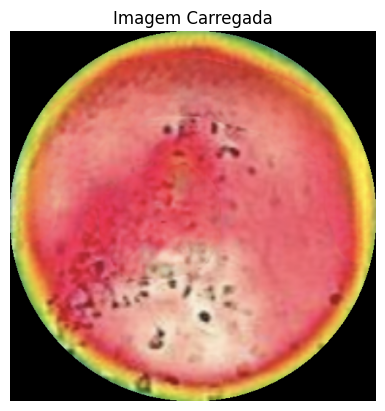

In [27]:
etanol = carregar_imagem("etanol.png")

In [28]:
mapa_temperatura_etanol = obter_mapa_temperatura(etanol,paleta_cores,20,80)

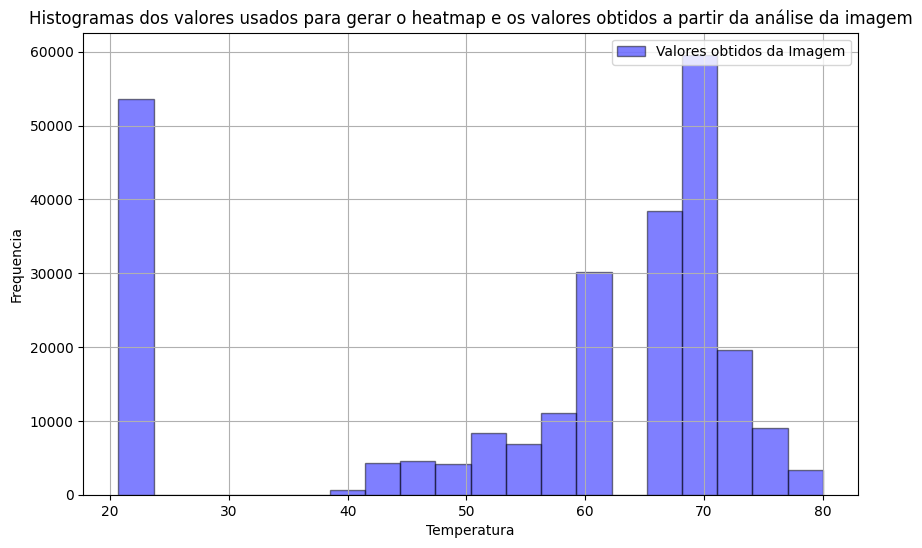

In [29]:
plotar_distribuicao_temperaturas(mapa_temperatura_etanol)

In [37]:
mapa_temperatura_etanol_circular = obter_mapa_temperatura_circular(etanol,paleta_cores,20,80)

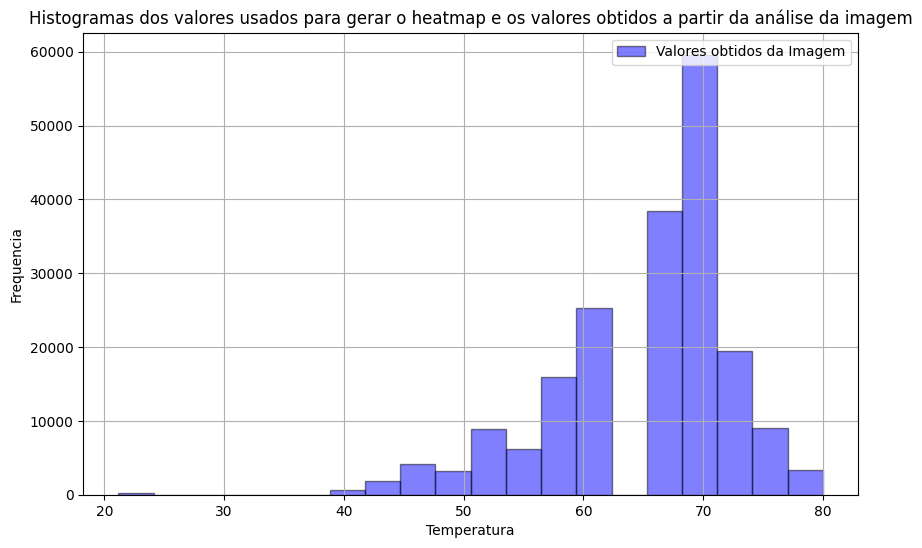

In [39]:
plotar_distribuicao_temperaturas(mapa_temperatura_etanol_circular)

## Água

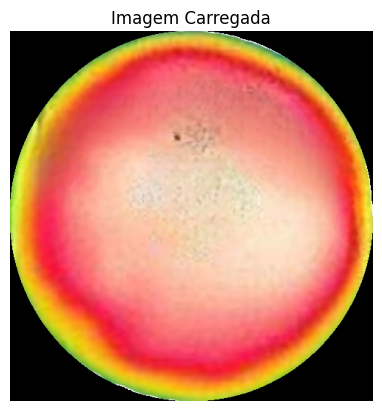

In [30]:
agua = carregar_imagem("agua.png")

In [31]:
mapa_temperatura_agua = obter_mapa_temperatura(agua,paleta_cores,20,80)

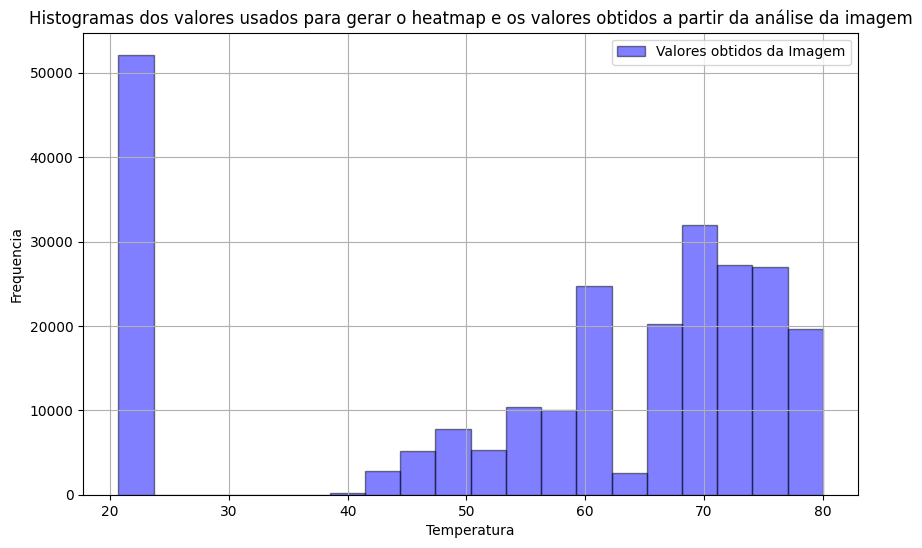

In [32]:
plotar_distribuicao_temperaturas(mapa_temperatura_agua)

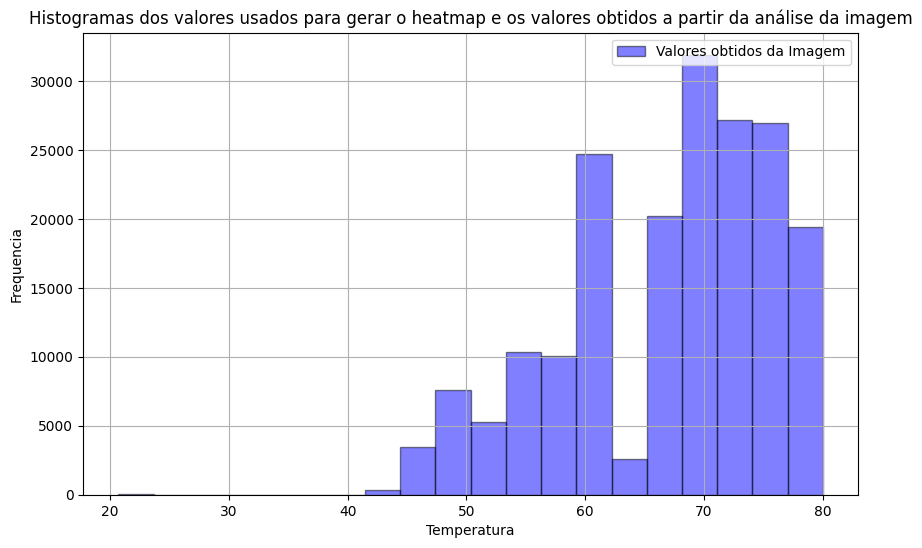

In [40]:
mapa_temperatura_agua_circular = obter_mapa_temperatura_circular(agua,paleta_cores,20,80)
plotar_distribuicao_temperaturas(mapa_temperatura_agua_circular)

## DEC

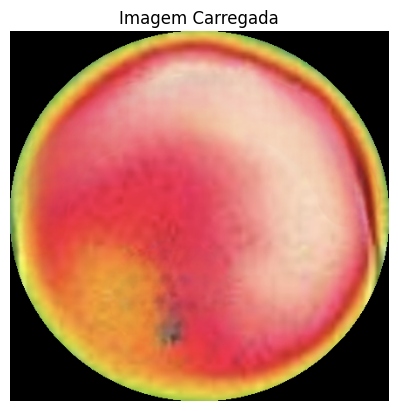

In [33]:
dec = carregar_imagem("DEC.png")

In [34]:
mapa_temperatura_dec = obter_mapa_temperatura(dec,paleta_cores,20,80)

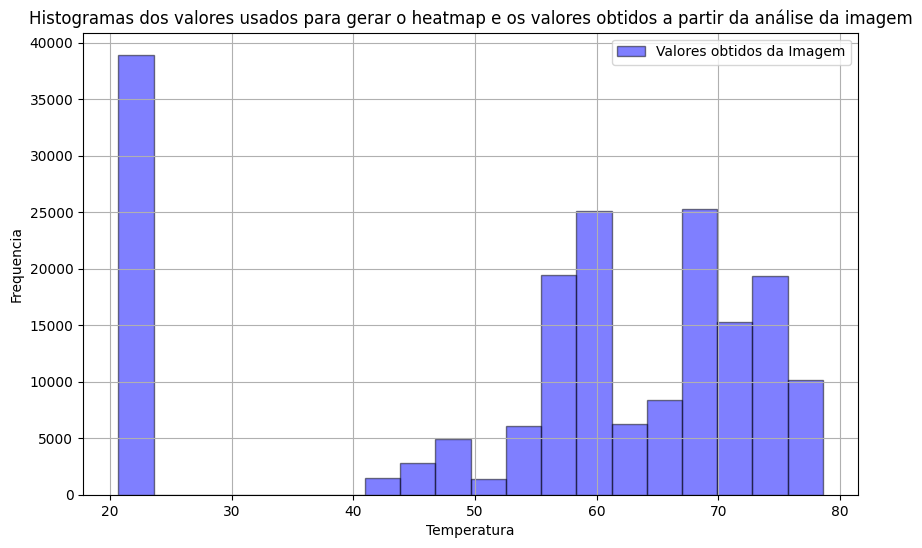

In [35]:
plotar_distribuicao_temperaturas(mapa_temperatura_dec)

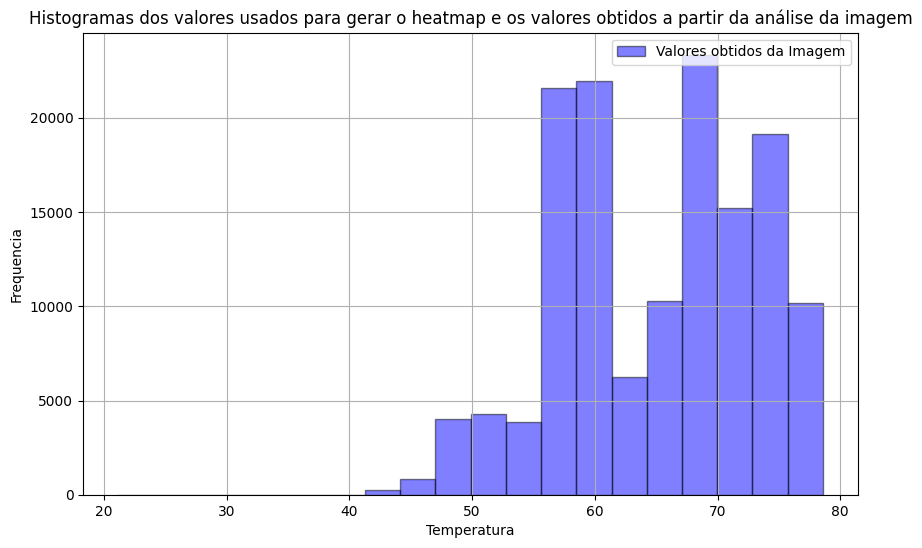

In [41]:
mapa_temperatura_dec_circular = obter_mapa_temperatura_circular(dec,paleta_cores,20,80)
plotar_distribuicao_temperaturas(mapa_temperatura_dec_circular)